### Nikolaos Athanasopoulos

# Epidemic data of COVID-19 in Catalonia

The [datoscovid.cat website](https://dadescovid.cat/?lang=cas) came into operation 28th of July 2020 to monitor the epidemiological epidemic of COVID-19 in Catalonia. In this notebook we will use data from this website and other sources.

You can also find interesting data in [transparenciacatalunya.cat](https://analisi.transparenciacatalunya.cat/Salut/Registre-de-defuncions-per-COVID-19-a-Catalunya-Se/uqk7-bf9s).



## Exercises:

Please, upload the completed notebook and the used files.

### Exercise 1:
We propose to explore data related with Covid-19 from Catalonia to analyze several aspects.
- **Exercise 1.A.**: Relationship between information of population of the municipality and the number of Covid-19 cases on it.

    After analyzing the relationship you should be able to answer the following questions:
    1. Do larger municipalities have a higher incidence of Covid-19?
    2. In Catalonia, the bigger the city the denser it is?
    3. Do municipalities with a higher population density have a higher incidence of Covid-19?


- **Exercise 1.B.**: Relationship between information of economy of the catalan region and the number of Covid-19 cases on it.

    After analyzing the relationship you should be able to answer the following questions:
    4. Do richer regions have a lower incidence of Covid-19?



- **Exercise 1.C.**: Analysis of the differences of Covid-19 affecting women and men in Catalonia
    
    After analyzing the relationship you should be able to answer the following questions:
    5. Does Covid-19 affect men more than women?
    6. What age groups does Covid-19 affect the most for men and women?


Please, answer the questions, and extract and write conclusions from the three anlysis. 

### Exercise 2: 

Think other possible questions which can be solved.


# Exercise 1.A. Relationship between the municipality's population and the number of Covid-19 cases

## Data from COVID-19 and municipality

Our first objective is to plot relationship between information of population of the municipalities and the number of Covid-19 cases on these municipalities.

For that, we need access to Covid-19 data and data from the municipalities in Catalonia that can be achieved from [datoscovid.cat](https://dadescovid.cat/) and from [IDESCAT](https://www.idescat.cat), respectively.

You can download the following files from the websites:
- Data of the register of Covid-19 cases carried out in Catalonia segregated by sex and municipality (source: [dadescovid.cat/descarregues](https://dadescovid.cat/descarregues)): "casos_sexe_municipi.csv"
- Data of population for the municipalities with more than 20.000 people (source: [IDESCAT](https://www.idescat.cat/pub/?id=aec&n=250)): "t15228.csv"


### Some help for the exercise:

- Load the two tables (casos_sexe_municipi.csv and t15228.csv) as dataframes.
- Clean the data and prepare it for analysis (there are empty rows in the files).
- Merge the two tables:
    - For the correct matching, check if the name of the municipalities are all the same in the two tables (apostrophes and accents).
- Plot the relationship between population and covid cases.
    - Remove outliers if there are any.
- Instead of using global numbers, compute the incidence of covid as a ratio of cases per capita and redraw the plot.
- Answer the questions posed.


In [282]:
# Your solution here

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [284]:
#path to my data folder 
path = "/Users/nikosathanasopoulos/Documents/2nd Semester/DSHealth/Assignment4/" 

I downloaded the "t15228.csv" file with the comma as a delimeter. In general, the format of t15228.csv is extremely poor. Upon inspection with a text editor, the header names can be found in the first five rows. I manually saved them in a list called header. Thus, I used the skiprows=5 and header=None parameters when reading the CSV file. Next, I removed all the rows that contained NaN values. Additionally, I named the column containing the municipality names as "MUNICIPIDESCRIPCIO", which is the same as the column name in casos_sexe_municipi.csv.

In [285]:
################################################################################################
#################################            t15228.csv          ###############################
################################################################################################

header = ["MUNICIPIDESCRIPCIO","Num Habitants","Superficie","Densitat","Rang per nombre d'hab"]
t15228 = pd.read_csv(path+'t15228.csv',skiprows=5,header=None, skip_blank_lines=True).dropna()
t15228.columns = header
t15228["MUNICIPIDESCRIPCIO"] = t15228["MUNICIPIDESCRIPCIO"].str.lower()
t15228["Num Habitants"] = t15228["Num Habitants"] + .0
t15228["Rang per nombre d'hab"] = t15228["Rang per nombre d'hab"] + .0
t15228.head(10)

,MUNICIPIDESCRIPCIO,Num Habitants,Superficie,Densitat,Rang per nombre d'hab
0,barcelona,1636193.0,101.4,16144.0,1.0
1,"hospitalet de llobregat, l'",265444.0,12.4,21406.8,2.0
2,terrassa,224114.0,70.2,3194.3,3.0
3,badalona,223506.0,21.2,10552.7,4.0
4,sabadell,215760.0,37.8,5709.5,5.0
5,lleida,140797.0,212.3,663.2,6.0
6,tarragona,134883.0,57.9,2330.4,7.0
7,mataró,128956.0,22.5,5723.8,8.0
8,santa coloma de gramenet,117981.0,7.0,16854.4,9.0
9,reus,106741.0,52.8,2020.8,10.0


In [286]:
t15228[t15228["MUNICIPIDESCRIPCIO"] == "barcelona"].head()

,MUNICIPIDESCRIPCIO,Num Habitants,Superficie,Densitat,Rang per nombre d'hab
0,barcelona,1636193.0,101.4,16144.0,1.0


### Merging the two Datasets

In [287]:
# This is some code to find the exact line that we are getting the encoding error

with open('casos_sexe_municipi.csv', 'rb') as f:
    try:
        content = f.read().decode('utf-8')
    except UnicodeDecodeError as e:
        print(f'Error at line {e.start}: {e.reason}')


Error at line 326: invalid continuation byte


I am reading the dataset and changing the first letter of the column MUNICIPIDESCRIPCIO to lowercase.

In [288]:
################################################################################################
#################################     casos_sexe_municipi.csv    ###############################
################################################################################################

casosMun = pd.read_csv(path+"casos_sexe_municipi.csv", sep=";", encoding="ISO-8859-1")
casosMun["MUNICIPIDESCRIPCIO"] = casosMun["MUNICIPIDESCRIPCIO"].str.lower()
casosMun.head(30)

,TIPUSCASDATA,COMARCACODI,COMARCADESCRIPCIO,MUNICIPICODI,MUNICIPIDESCRIPCIO,DISTRICTE_CODI,DISTRICTEDESCRIPCIO,SEXECODI,SEXEDESCRIPCIO,TIPUSCASDESCRIPCIO,NUMCASOS
0,23/9/20,11.0,BAIX LLOBREGAT,8073.0,cornell de llobregat,NaN,No classificat,1.0,Dona,Positiu per ELISA,3
1,3/8/21,NaN,NaN,NaN,no classificat,NaN,No classificat,NaN,No classificat,Epidemiològic,3
2,9/3/21,NaN,NaN,NaN,no classificat,NaN,No classificat,NaN,No classificat,Epidemiològic,2
3,10/6/20,13.0,BARCELONES,8019.0,barcelona,10.0,SANT MARTO,0.0,Home,Positiu per ELISA,6
4,5/6/20,40.0,VALLESOCCIDENTAL,8187.0,sabadell,NaN,No classificat,1.0,Dona,Positiu per ELISA,2
5,24/8/20,13.0,BARCELONES,8019.0,barcelona,9.0,SANT ANDREU,1.0,Dona,Positiu per ELISA,1
6,8/9/20,13.0,BARCELONES,8019.0,barcelona,6.0,GR CIA,0.0,Home,Positiu per ELISA,2
7,7/7/21,13.0,BARCELONES,8019.0,barcelona,2.0,EIXAMPLE,0.0,Home,Positiu per Test Rapid,3
8,10/8/20,13.0,BARCELONES,8019.0,barcelona,10.0,SANT MARTO,0.0,Home,Positiu per ELISA,8
9,27/5/20,11.0,BAIX LLOBREGAT,8056.0,castelldefels,NaN,No classificat,1.0,Dona,Positiu per ELISA,2


In [289]:
casosMun.shape

(523564, 11)

We can see here that we have a lot of NaN's. Though, we need to be careful on the lines that we are going to remove. To be more specific, we are going to remove the lines that have <b>NaN values at the columns 'MUNICIPIDESCRIPCIO', 'NUMCASOS'</b> which are significant for our task.

In [290]:
#casosMun = casosMun.dropna()
# drop rows where MUNICIPIDESCRIPCIO and Num. Habitants are both empty
casosMun = casosMun.dropna(subset=['MUNICIPIDESCRIPCIO', 'NUMCASOS'])
casosMun.head(20)

,TIPUSCASDATA,COMARCACODI,COMARCADESCRIPCIO,MUNICIPICODI,MUNICIPIDESCRIPCIO,DISTRICTE_CODI,DISTRICTEDESCRIPCIO,SEXECODI,SEXEDESCRIPCIO,TIPUSCASDESCRIPCIO,NUMCASOS
0,23/9/20,11.0,BAIX LLOBREGAT,8073.0,cornell de llobregat,NaN,No classificat,1.0,Dona,Positiu per ELISA,3
1,3/8/21,NaN,NaN,NaN,no classificat,NaN,No classificat,NaN,No classificat,Epidemiològic,3
2,9/3/21,NaN,NaN,NaN,no classificat,NaN,No classificat,NaN,No classificat,Epidemiològic,2
3,10/6/20,13.0,BARCELONES,8019.0,barcelona,10.0,SANT MARTO,0.0,Home,Positiu per ELISA,6
4,5/6/20,40.0,VALLESOCCIDENTAL,8187.0,sabadell,NaN,No classificat,1.0,Dona,Positiu per ELISA,2
5,24/8/20,13.0,BARCELONES,8019.0,barcelona,9.0,SANT ANDREU,1.0,Dona,Positiu per ELISA,1
6,8/9/20,13.0,BARCELONES,8019.0,barcelona,6.0,GR CIA,0.0,Home,Positiu per ELISA,2
7,7/7/21,13.0,BARCELONES,8019.0,barcelona,2.0,EIXAMPLE,0.0,Home,Positiu per Test Rapid,3
8,10/8/20,13.0,BARCELONES,8019.0,barcelona,10.0,SANT MARTO,0.0,Home,Positiu per ELISA,8
9,27/5/20,11.0,BAIX LLOBREGAT,8056.0,castelldefels,NaN,No classificat,1.0,Dona,Positiu per ELISA,2


I chose to make all the municipality names lower-case since that is the common column I plan to use for merging both datasets. However, upon closer inspection, I noticed that there are 4 names that have a preceding article, which causes them to be different even though they are lower-cased. As a solution, I manually replaced those values to ensure that they match between both datasets.

In [291]:
mun = casosMun.MUNICIPIDESCRIPCIO.unique()
mun[:10]

array(['cornell  de llobregat', 'no classificat', 'barcelona', 'sabadell',
       'castelldefels', 'sallent', 'badalona', 'viladecans',
       'sant cugat del valls', 'torelló'], dtype=object)

We are able now to implement the join of the datasets.

In [292]:
data = pd.merge(t15228,casosMun,on="MUNICIPIDESCRIPCIO",how="inner")
data.head()

,MUNICIPIDESCRIPCIO,Num Habitants,Superficie,Densitat,Rang per nombre d'hab,TIPUSCASDATA,COMARCACODI,COMARCADESCRIPCIO,MUNICIPICODI,DISTRICTE_CODI,DISTRICTEDESCRIPCIO,SEXECODI,SEXEDESCRIPCIO,TIPUSCASDESCRIPCIO,NUMCASOS
0,barcelona,1636193.0,101.4,16144.0,1.0,10/6/20,13.0,BARCELONES,8019.0,10.0,SANT MARTO,0.0,Home,Positiu per ELISA,6
1,barcelona,1636193.0,101.4,16144.0,1.0,24/8/20,13.0,BARCELONES,8019.0,9.0,SANT ANDREU,1.0,Dona,Positiu per ELISA,1
2,barcelona,1636193.0,101.4,16144.0,1.0,8/9/20,13.0,BARCELONES,8019.0,6.0,GR CIA,0.0,Home,Positiu per ELISA,2
3,barcelona,1636193.0,101.4,16144.0,1.0,7/7/21,13.0,BARCELONES,8019.0,2.0,EIXAMPLE,0.0,Home,Positiu per Test Rapid,3
4,barcelona,1636193.0,101.4,16144.0,1.0,10/8/20,13.0,BARCELONES,8019.0,10.0,SANT MARTO,0.0,Home,Positiu per ELISA,8


In [293]:
data.MUNICIPIDESCRIPCIO.nunique(),t15228.MUNICIPIDESCRIPCIO.nunique()

(54, 67)

### Relationship between population and covid cases

To investigate whether there is a correlation between the population size and the number of COVID-19 cases in different municipalities, I constructed a DataFrame that summarizes the total number of cases in each municipality.

In [294]:
correlationCases = data.groupby(["MUNICIPIDESCRIPCIO","Num Habitants"])["NUMCASOS"].agg("sum").reset_index()
correlationCases.head()

,MUNICIPIDESCRIPCIO,Num Habitants,NUMCASOS
0,amposta,21807.0,7188
1,badalona,223506.0,77848
2,banyoles,20187.0,7663
3,barcelona,1636193.0,580275
4,blanes,40579.0,13599


<u>Comment:</u>    We can clearly observe that we need to remove Barcelona, due to the fact that it contains the vast majority of the population.

In [295]:
print(correlationCases.dtypes)

MUNICIPIDESCRIPCIO     object
Num Habitants         float64
NUMCASOS                int64
dtype: object


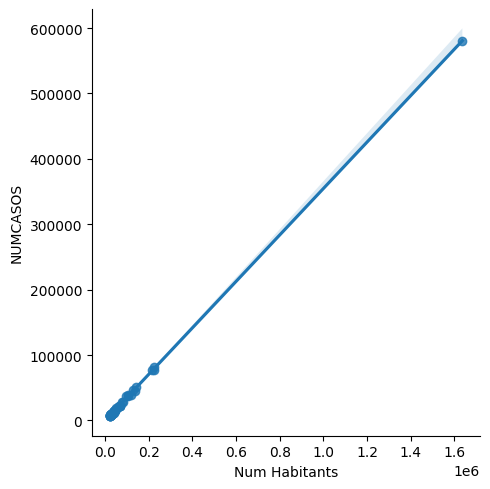

In [296]:
import seaborn as sns
def plot_corr(df,x,y):
    sns.lmplot(x=x,y=y,data=df,fit_reg=True)
    
plot_corr(correlationCases,'Num Habitants',"NUMCASOS")

In this particular case barcelona is an outlier.

In [297]:
correlationCases = correlationCases[correlationCases.MUNICIPIDESCRIPCIO != "barcelona"]

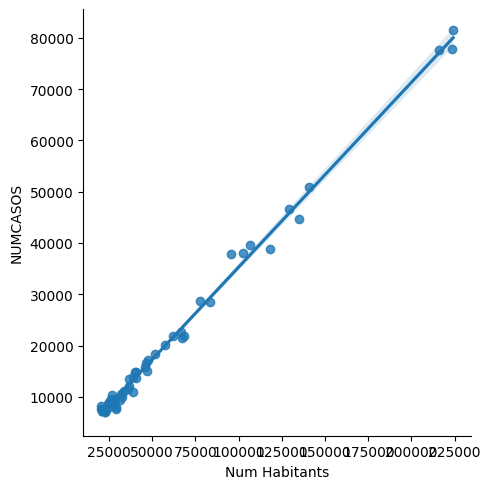

In [298]:
#This function recieves a dataframe and two column's as axis y and x.
#Is a helper that plots data and regression models so we can visually see possible correlations.

import seaborn as sns
def plot_corr(df,x,y):
    sns.lmplot(x=x,y=y,data=df,fit_reg=True)
    
plot_corr(correlationCases,'Num Habitants',"NUMCASOS")

Now the correlation plot is better than before, but still we have some outliers. Maybe we need to remove more values. At this point we have to define that an outlier of a dataset is defined as a value that is more than 3 standard deviations from the mean, which is known as Z-Score, which scipy is able to compute for me. Below we can see that with this metric I removed 3 municipalities:

In [299]:
correlationCases.corr()[["NUMCASOS"]]

/var/folders/qz/f43xldgd339f63pl19dqgt9w0000gn/T/ipykernel_28632/837104733.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationCases.corr()[["NUMCASOS"]]


,NUMCASOS
Num Habitants,0.997304
NUMCASOS,1.000000


In [300]:
#This function recieves a dataframe and a list with column names.
#Returns another dataframe with the outliers removed of the columns present in the list.

from scipy import stats
def remove_outliers(df,columns):
    z_scores = stats.zscore(df[columns])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1)
    no_outliers = df[filtered_entries]
    print("Old dataframe shape: ",df.shape,"\nNew Dataframe after removing outliers:",no_outliers.shape)
    return no_outliers

In [301]:
no_outliers = remove_outliers(correlationCases.drop(["MUNICIPIDESCRIPCIO"],axis=1),["Num Habitants"])

Old dataframe shape:  (53, 2) 
New Dataframe after removing outliers: (50, 2)


We can observe that in this case 3 outliers were removed.

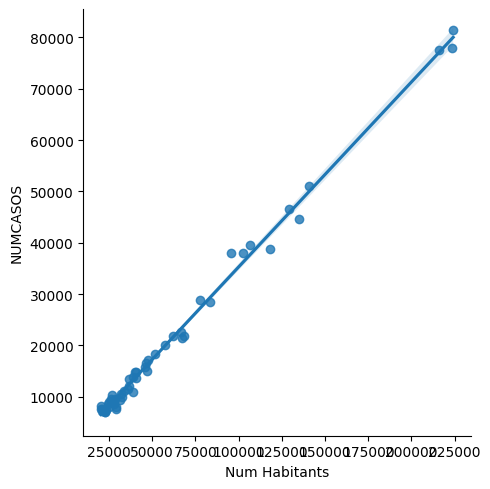

In [302]:
plot_corr(correlationCases,'Num Habitants',"NUMCASOS")

In [303]:
no_outliers.corr()[["NUMCASOS"]]

,NUMCASOS
Num Habitants,0.99346
NUMCASOS,1.00000


### Ratio per habitant

I calculated a new metric by dividing the number of COVID-19 cases in a region by its population size, which I named "Cases x Habitant". I then used this new metric to generate updated plots and visualizations, in order to gain a better understanding of the relationship between COVID-19 cases and population density.

In [304]:
no_outliers["Cases x Habitant"] = no_outliers["NUMCASOS"] / no_outliers["Num Habitants"]
no_outliers.head()

,Num Habitants,NUMCASOS,Cases x Habitant
0,21807.0,7188,0.329619
2,20187.0,7663,0.379601
4,40579.0,13599,0.335124
5,29102.0,7959,0.273486
6,35675.0,11571,0.324345


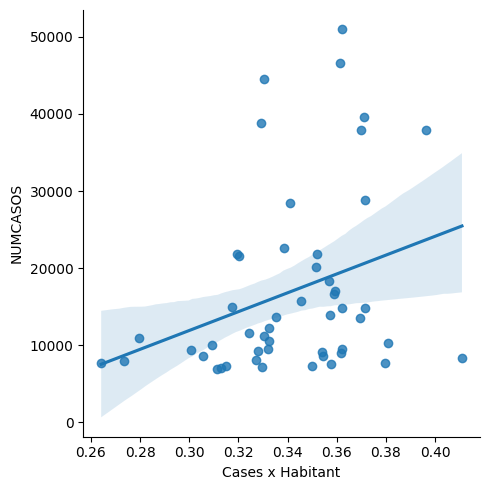

In [305]:
plot_corr(no_outliers,'Cases x Habitant',"NUMCASOS")

In [306]:
no_outliers.corr()[["NUMCASOS"]]

,NUMCASOS
Num Habitants,0.993460
NUMCASOS,1.000000
Cases x Habitant,0.307181


We observe that there is a strong correlation in this plot with this ratio per habitant.

### Relationship between region area and density

In [307]:
comparison = data[["MUNICIPIDESCRIPCIO","Densitat","Superficie"]].drop_duplicates()
comparison.head()

,MUNICIPIDESCRIPCIO,Densitat,Superficie
0,barcelona,16144.0,101.4
40651,terrassa,3194.3,70.2
44356,badalona,10552.7,21.2
48659,sabadell,5709.5,37.8
52466,lleida,663.2,212.3


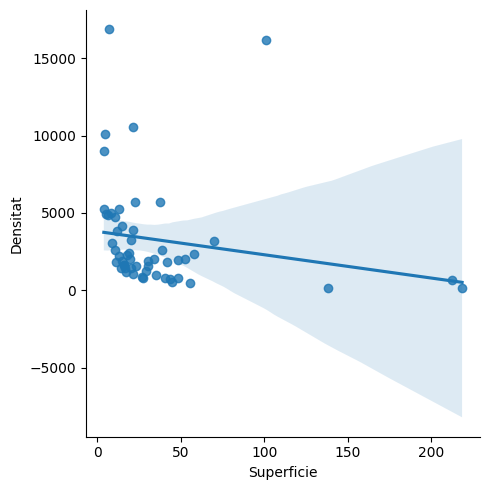

In [308]:
plot_corr(comparison,"Superficie","Densitat")

In [309]:
comparison.corr()[["Densitat"]]

/var/folders/qz/f43xldgd339f63pl19dqgt9w0000gn/T/ipykernel_28632/3966194170.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  comparison.corr()[["Densitat"]]


,Densitat
Densitat,1.000000
Superficie,-0.185689


Based on the data and plot analysis, it can be concluded that in Catalonia, the size of a region does not necessarily correspond to its population density. In other words, the data does not show a clear relationship between region size and population density.

### Relationship between municipalities population density and Covid cases

In [310]:
correlationDens = data.groupby(["MUNICIPIDESCRIPCIO","Densitat"])["NUMCASOS"].agg("sum").reset_index()
correlationDens.head()

,MUNICIPIDESCRIPCIO,Densitat,NUMCASOS
0,amposta,157.7,7188
1,badalona,10552.7,77848
2,banyoles,1826.9,7663
3,barcelona,16144.0,580275
4,blanes,2297.8,13599


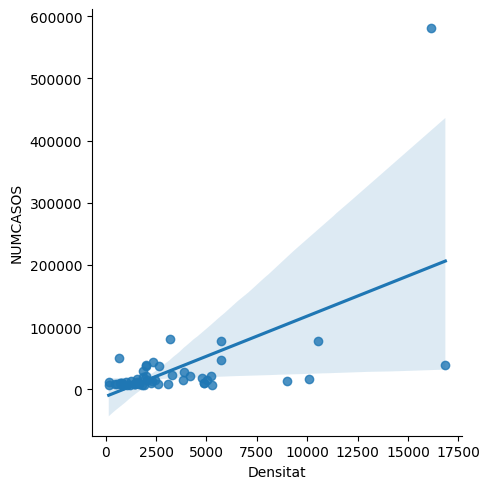

In [311]:
plot_corr(correlationDens,'Densitat',"NUMCASOS")

In [312]:
no_outliers = remove_outliers(correlationDens.drop(["MUNICIPIDESCRIPCIO"],axis=1),["Densitat"])

Old dataframe shape:  (54, 2) 
New Dataframe after removing outliers: (52, 2)


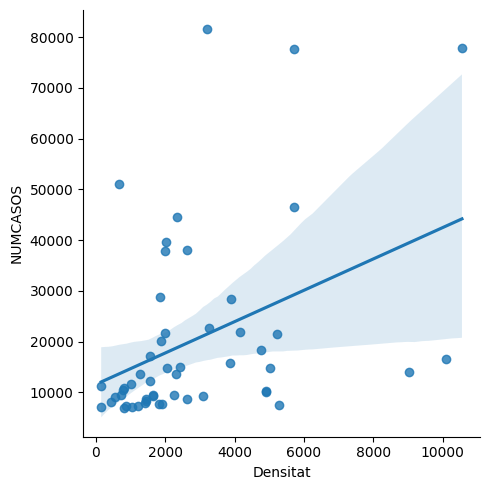

In [313]:
plot_corr(no_outliers,'Densitat',"NUMCASOS")

In [314]:
no_outliers.corr()[["NUMCASOS"]]

,NUMCASOS
Densitat,0.393499
NUMCASOS,1.000000


Based on the plot and the correlation analysis using the Pearson method, it appears that there is no significant correlation between the population density of a municipality and the number of COVID-19 cases. Therefore, we can conclude that there is no clear relationship between population density and the spread of COVID-19 in municipalities.

# Exercise 1.B. Relationship between catalan region economy and number of Covid-19 cases

## Data from COVID-19 and region (comarca)


For the second analysis, we can find data of the Territorial gross domestic product (GDP) (in catalan: Producte interior brut territorial (PIB)) (base 2017) for the anlaysis from [IDESCAT](https://www.idescat.cat/).

You can download the following files from the websites:
- Data of the register of cases of COVID-19 carried out in Catalonia segregated by sex and municipality (source: [dadescovid.cat/descarregues](https://dadescovid.cat/descarregues)): "casos_sexe_municipi.csv"
- Data of the Producte interior brut territorial (PIB) by region (in ctalan: comarca) (base 2017) (source: [IDESCAT](https://www.idescat.cat/pub/?id=aec&n=358)): "t15336.csv"
- Population data by municipalities and regions (source: [IDESCAT](https://www.idescat.cat/pub/?id=aec&n=925&t=2019)): "t15903.csv"


In [315]:
# Your solution here

As part of a data analysis project, I was tasked with processing a file called "t15336.csv". The file contained some NaN's which I removed before proceeding with further processing. One of the columns in the file, named "Comarques i Aran", was identified as the pivot column for a later merge operation.

To prepare the "Comarques i Aran" column for the merge operation, I performed some pre-processing steps. First, I removed all the accents from the column values using the ".str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')" command. Second, I converted all the column values to lower case. Finally, I removed the row containing the word "Catalunya" as it was not a region but a sum-up.

In summary, my process involved the following steps:

- Read the "t15336.csv" file.
- Remove NaN's from the file.
- Identify the "Comarques i Aran" column as the pivot column for a later merge operation.
- Pre-process the "Comarques i Aran" column by:
- Removing accents from the values.
- Converting all values to lower case.
- Removing the row containing the word "Catalunya".

In [316]:
################################################################################################
#################################           t15336.csv           ###############################
################################################################################################

header = ["Comarques i Aran","PIB (milions d'euros)","PIB per habitant (milers d'euros)","Índex Catalunya = 100",]
t15336 = pd.read_csv(path+"t15336.csv",decimal=",",skiprows=7,header=None, skip_blank_lines=True).dropna()
t15336.columns = header
t15336["Comarca"] = t15336["Comarques i Aran"].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()
t15336 = t15336[t15336["Comarca"] != "catalunya"]
t15336= t15336.drop(["Comarques i Aran"],axis=1)
t15336.head()

,PIB (milions d'euros),PIB per habitant (milers d'euros),Índex Catalunya = 100,Comarca
0,1455.2,32.3,111.0,alt camp
1,3162.1,22.6,77.6,alt emporda
2,3097.9,28.1,96.6,alt penedes
3,441.1,21.9,75.3,alt urgell
4,81.3,20.8,71.3,alta ribagorca


### Merging the two Datasets

Before merging the file with "casos_sexe_municipi.csv", some pre-processing was required for the "COMARCADESCRIPCIO" column. Firstly, I removed all accents from the values, lower-cased all the entries, and changed the column name. Additionally, to match the corresponding region name in "t15336.csv", I updated "Vall d'Aran" to "Aran". After completing the pre-processing steps, I summed all the Covid cases by grouping the data based on the "Comarca" column.

In [317]:
casesRegion = casosMun.copy()[["COMARCADESCRIPCIO","NUMCASOS"]]
casesRegion["Comarca"] = casesRegion["COMARCADESCRIPCIO"].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()
casesRegion = casesRegion.drop(["COMARCADESCRIPCIO"],axis=1)
casesRegion["Comarca"] = casesRegion["Comarca"].replace("vall d'aran","aran")
casesRegion = casesRegion.groupby("Comarca").sum().reset_index()
casesRegion.head()

,Comarca,NUMCASOS
0,alt camp,13778
1,alt emporda,43066
2,alt penedes,38196
3,alt urgell,6631
4,alta ribagorca,1197


In [318]:
covidRegion = pd.merge(gdpReg,casesRegion,on="Comarca",how="inner")
covidRegion.head()

,PIB (milions d'euros),PIB per habitant (milers d'euros),Índex Catalunya = 100,Comarca,NUMCASOS
0,1455.2,32.3,111.0,alt camp,13778
1,3162.1,22.6,77.6,alt emporda,43066
2,3097.9,28.1,96.6,alt penedes,38196
3,441.1,21.9,75.3,alt urgell,6631
4,81.3,20.8,71.3,alta ribagorca,1197


In [320]:
print(covidRegion.isnull().sum())

PIB (milions d'euros)                0
PIB per habitant (milers d'euros)    0
Índex Catalunya = 100                0
Comarca                              0
NUMCASOS                             0
dtype: int64


In [321]:
covidRegion = covidRegion.dropna()

In [322]:
print(covidRegion.dtypes)

PIB (milions d'euros)                object
PIB per habitant (milers d'euros)    object
Índex Catalunya = 100                object
Comarca                              object
NUMCASOS                              int64
dtype: object


We have to change the column types in order to plot.

In [323]:
covidRegion['PIB (milions d\'euros)'] = covidRegion['PIB (milions d\'euros)'].astype(float)
covidRegion['PIB per habitant (milers d\'euros)'] = covidRegion['PIB per habitant (milers d\'euros)'].astype(float)
covidRegion['Índex Catalunya = 100'] = covidRegion['Índex Catalunya = 100'].astype(float)
covidRegion['Comarca'] = covidRegion['Comarca'].astype('category')
covidRegion['NUMCASOS'] = covidRegion['NUMCASOS'].astype(int)

In [324]:
print(covidRegion.dtypes)

PIB (milions d'euros)                 float64
PIB per habitant (milers d'euros)     float64
Índex Catalunya = 100                 float64
Comarca                              category
NUMCASOS                                int64
dtype: object


In [325]:
def plot_corr(df,x,y):
    sns.lmplot(x=x,y=y,data=df,fit_reg=True)
    plt.title('Correlation between ' + x + ' and ' + y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

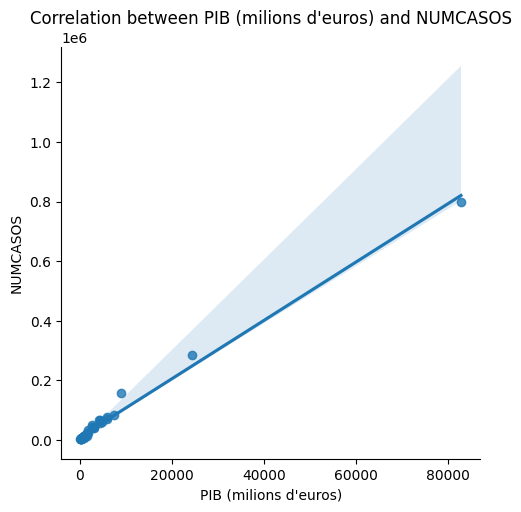

In [326]:
plot_corr(covidRegion,"PIB (milions d'euros)",'NUMCASOS')

In [327]:
covidRegion.corr()[["NUMCASOS"]]

/var/folders/qz/f43xldgd339f63pl19dqgt9w0000gn/T/ipykernel_28632/3172628703.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covidRegion.corr()[["NUMCASOS"]]


,NUMCASOS
PIB (milions d'euros),0.994094
PIB per habitant (milers d'euros),0.359656
Índex Catalunya = 100,0.359039
NUMCASOS,1.000000


### Removing Outliers for PIB (millions d'euros)

In [328]:
no_outliers = remove_outliers(covidRegion,["PIB (milions d'euros)"])

Old dataframe shape:  (40, 5) 
New Dataframe after removing outliers: (39, 5)


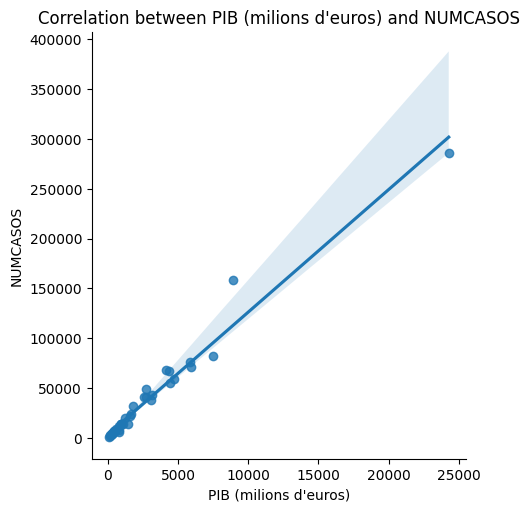

In [329]:
plot_corr(no_outliers,"PIB (milions d'euros)",'NUMCASOS')

In [330]:
no_outliers.corr()

/var/folders/qz/f43xldgd339f63pl19dqgt9w0000gn/T/ipykernel_28632/4291624477.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  no_outliers.corr()


,PIB (milions d'euros),PIB per habitant (milers d'euros),Índex Catalunya = 100,NUMCASOS
PIB (milions d'euros),1.000000,0.176858,0.177140,0.983674
PIB per habitant (milers d'euros),0.176858,1.000000,0.999989,0.087296
Índex Catalunya = 100,0.177140,0.999989,1.000000,0.087626
NUMCASOS,0.983674,0.087296,0.087626,1.000000


Upon removing outliers from the dataset, a clear correlation was observed between the PIB (which represents the total value of goods and services produced in a region over a specific time period) and the incidence of Covid cases. Contrary to what one might expect, the analysis suggests that regions with higher PIB actually have a higher incidence of Covid cases, rather than lower.

# Exercise 1.C. Analyze the differences of Covid-19 affecting women and men in Catalonia

The last objective is to analyze the difference between the incidence of Covid-19 in women and men for all the municipalities in Catalonia. For that we just need access data of number of cases per sex and minicipality and build a population pyramid over ages, as the one presented here:
https://altair-viz.github.io/gallery/us_population_pyramid_over_time.html

You can download the following files from the websites:
- Data of the register of cases of COVID-19 carried out in Catalonia segregated by sex and age (source: [dadescovid.cat/descarregues](https://dadescovid.cat/descarregues)): "casos_sexe_edat.csv"


In [331]:
# Your solution here

Answer the questions and write your conlcusions here:

In [332]:
population = pd.read_csv(path+"casos_sexe_edat.csv", sep=";", encoding="ISO-8859-1",engine="python").dropna()
population.head()

,TIPUSCASDATA,REGIOSANITARIACODI,REGIOSANITARIADESCRIPCIO,EDATRANG,SEXECODI,SEXEDESCRIPCIO,TIPUSCASDESCRIPCIO,NUMCASOS
0,17/04/2020,7802,METROPOLITANA NORD,40-49,1.0,Dona,Positiu per ELISA,6
1,16/03/2021,7801,METROPOLITANA SUD,10-19,0.0,Home,Positiu per Test Ràpid,1
2,22/04/2020,7801,METROPOLITANA SUD,40-49,1.0,Dona,Positiu per ELISA,3
3,01/03/2021,7803,BARCELONA CIUTAT,70-79,0.0,Home,Positiu per ELISA,4
4,12/08/2020,7801,METROPOLITANA SUD,40-49,0.0,Home,Positiu per ELISA,2


In order to obtain the total number of cases for each age range and sex, we need to transform the original dataframe by pivoting it. We can use the Pandas pivot_table command to achieve this.

In [333]:
plot_data = pd.pivot_table(population,values="NUMCASOS",columns=["SEXEDESCRIPCIO"],index=["EDATRANG"],aggfunc=["sum"])
plot_data.columns = plot_data.columns.droplevel()
plot_data = plot_data.rename_axis(None).reset_index().sort_values("index",ascending=False)
plot_data.head()

SEXEDESCRIPCIO,index,Dona,Home
10,No classificat,2727,3098
9,90+,35047,14001
8,80-89,60862,44678
7,70-79,84880,73362
6,60-69,119185,100686


After examining the data, we can observe that pivoting the dataframe is necessary to obtain the total number of cases classified by sex and age range. For this, we can utilize the Pandas pivot_table function which is ideal for this type of situation.

Once the dataframe has been pivoted, we can create a pyramid plot of the age ranges.

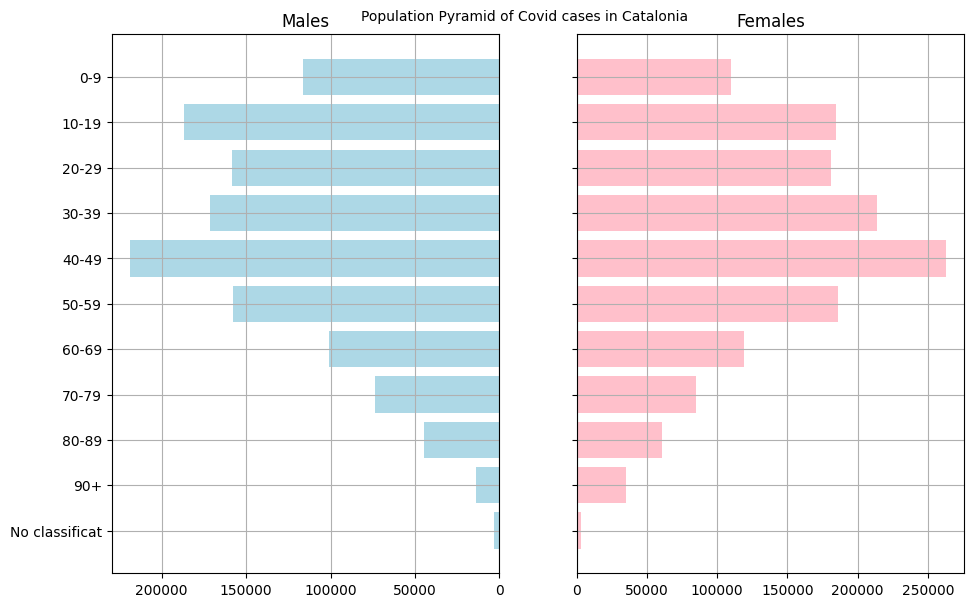

In [334]:
#define x and y limits
y = range(0, len(plot_data))
x_male = plot_data['Home']
x_female = plot_data['Dona']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(11, 7))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:white')
plt.figtext(.5,.9,"Population Pyramid of Covid cases in Catalonia", fontsize=10, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='lightblue')
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='pink')
axes[1].set(title='Females')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=plot_data['index'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

In [335]:
population.groupby("SEXEDESCRIPCIO")["NUMCASOS"].sum()

SEXEDESCRIPCIO
Dona    1441670
Home    1244606
Name: NUMCASOS, dtype: int64

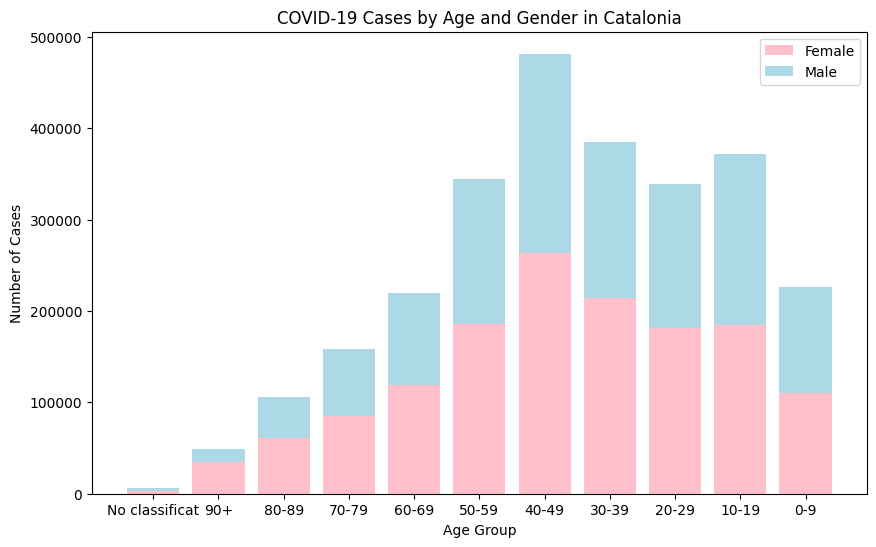

In [339]:
# create stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(plot_data["index"], plot_data["Dona"], label="Female", color="pink")
ax.bar(plot_data["index"], plot_data["Home"], bottom=plot_data["Dona"], label="Male", color="lightblue")
ax.set_xlabel("Age Group")
ax.set_ylabel("Number of Cases")
ax.set_title("COVID-19 Cases by Age and Gender in Catalonia")
ax.legend()
plt.show()

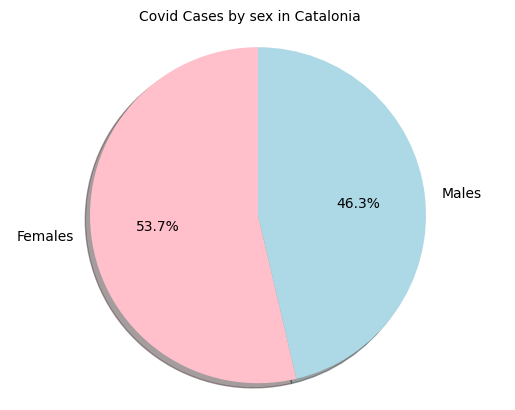

In [336]:
labels = 'Females', 'Males'
sizes = [1441670, 1244606]
colors = ['pink', 'lightblue']  # set custom colors
fig1, ax1 = plt.subplots()
plt.figtext(.5,.9,"Covid Cases by sex in Catalonia", fontsize=10, ha='center')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)  # use the colors parameter
ax1.axis('equal')

plt.show()

<b><u>Conclusion</u></b>

With the pink colour you can see the proportion for women, and with the blue colour the corresponding proportion for men. As observed above, the number of registered Covid cases in women is greater than that in men. Precisely, there are 197064 more Covid cases registered in women than in men. Regarding the age groups, we can see that the 40-49 age group has the highest number of registered Covid cases for both men and women. In fact, the age range between 30 and 59 years old is the most affected group, and this is why we see a contracting-shaped pyramid where the middle is wider than the top and bottom.

However, we must consider that the number of individuals in each age group is not taken into account. For instance, in Catalonia, there are more individuals in the age range of 30-59 than in any other group. Therefore, we cannot assume that Covid affects people between the ages of 40 and 49 more heavily than people between the ages of 80-90+, because there are far fewer individuals in the 80-90+ age group. In order to make a fair comparison, we need to calculate the percentages of Covid cases for each age group.

### Exercise 2:

In [ ]:
# Your solution here

A first implementation would be to divide the country into regions based on the sanitary codes. I'm going to analyze the Covid cases on men and women by sanitary region by rotating the table and utilizing the sanitary region as an index in order to find out which regions had the most instances and which locations saw women affected more severely than men.

In [448]:
sanRegCode = pd.pivot_table(population,values="NUMCASOS",columns=["SEXEDESCRIPCIO"],index=["REGIOSANITARIACODI"],aggfunc=["sum"])
sanRegCode.columns = sanRegCode.columns.droplevel()
sanRegCode = sanRegCode.rename_axis(None).reset_index()
sanRegCode.head()

SEXEDESCRIPCIO,index,Dona,Home
0,0,3,1
1,6100,70139,62765
2,6200,107594,93632
3,6300,28214,25028
4,6400,158353,136890


In [449]:
sanRegCode['index'].unique()

array([   0, 6100, 6200, 6300, 6400, 6700, 7100, 7801, 7802, 7803])

In [450]:
sanRegCode['Dona'].unique()

array([     3,  70139, 107594,  28214, 158353, 103583,  12805, 251008,
       384066, 325905])

In [451]:
sanRegCode['Home'].unique()

array([     1,  62765,  93632,  25028, 136890,  90466,  11192, 217570,
       334669, 272393])

To begin with, below you can observe a side by side stacked bar for every region, both for men (lightblue) and women (pink). This is a nice way and easy visualy to compare the difference on cases for men and women per region. 

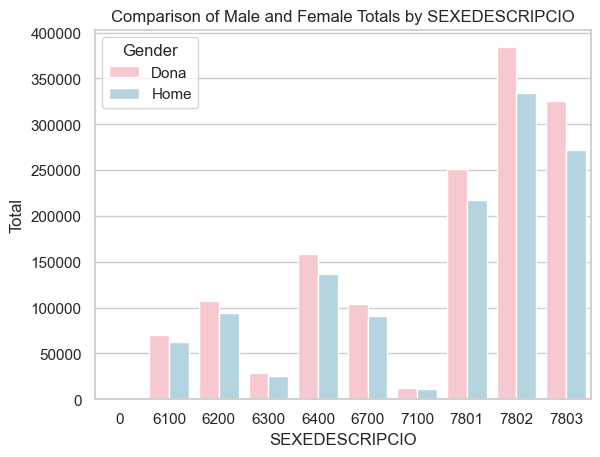

In [441]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
data = pd.DataFrame({
    "SEXEDESCRIPCIO": ["0", "6100", "6200", "6300", "6400", "6700", "7100", "7801", "7802", "7803"],
    "index": [0, 6100, 6200, 6300, 6400, 6700, 7100, 7801, 7802, 7803],
    "Dona": [3, 70139, 107594,  28214, 158353, 103583,  12805, 251008, 384066, 325905],
    "Home": [1,  62765,  93632,  25028, 136890,  90466,  11192, 217570,334669, 272393]
})

# Melt the data to reshape it
melted_data = pd.melt(data, id_vars=["index"],
                      value_vars=["Dona", "Home"],
                      var_name="Gender", value_name="Total")

# Create a stacked bar plot with hue set to Gender
sns.barplot(x="index", y="Total", data=melted_data, hue="Gender",
            palette={"Dona": "pink", "Home": "lightblue"})

# Set axis labels and title
plt.xlabel("SEXEDESCRIPCIO")
plt.ylabel("Total")
plt.title("Comparison of Male and Female Totals by SEXEDESCRIPCIO")

# Show the plot
plt.show()

Furthermore, we are going to plot the Total number of cases that each region had during the COVID period.

In [452]:
sanRegCode["Diff"] = abs(sanRegCode["Dona"] - sanRegCode["Home"])
sanRegCode["Total"] = sanRegCode["Dona"] + sanRegCode["Home"]

sanRegCode.sort_values("Diff",ascending=False)

SEXEDESCRIPCIO,index,Dona,Home,Diff,Total
9,7803,325905,272393,53512,598298
8,7802,384066,334669,49397,718735
7,7801,251008,217570,33438,468578
4,6400,158353,136890,21463,295243
2,6200,107594,93632,13962,201226
5,6700,103583,90466,13117,194049
1,6100,70139,62765,7374,132904
3,6300,28214,25028,3186,53242
6,7100,12805,11192,1613,23997
0,0,3,1,2,4


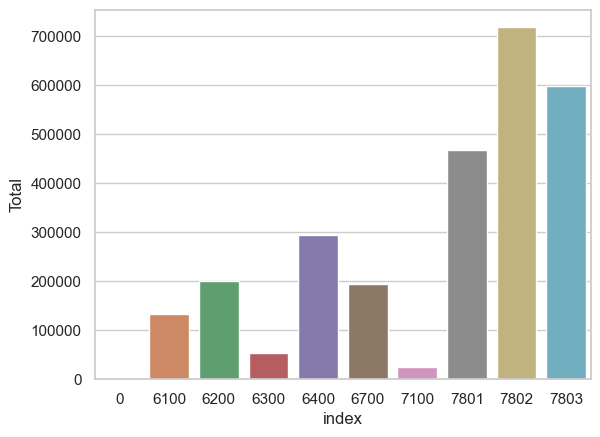

In [453]:
ax = sns.barplot(x="index", y="Total", data=sanRegCode.sort_values("Total",ascending=False))

### Another implementation

Another implementation, would be to take a different tack and divide the country into sanitary zones rather than region codes or municipalities or "comarques" in order to analyze the impact of COVID. This approach is better due to the fact that the sanitary region codes are translated now to a description, which easier for to understand. In order to determine which locations had the most cases and which regions saw women afflicted more severely than men, I'm actually going to investigate the Covid cases on man and woman by sanitary region by pivoting the table using as an index the sanitary region.

In [426]:
sanReg = pd.pivot_table(population,values="NUMCASOS",columns=["SEXEDESCRIPCIO"],index=["REGIOSANITARIADESCRIPCIO"],aggfunc=["sum"])
sanReg.columns = sanReg.columns.droplevel()
sanReg = sanReg.rename_axis(None).reset_index()
sanReg.head()

SEXEDESCRIPCIO,index,Dona,Home
0,ALT PIRINEU I ARAN,12805,11192
1,BARCELONA CIUTAT,325905,272393
2,CAMP DE TARRAGONA,107594,93632
3,CATALUNYA CENTRAL,103583,90466
4,GIRONA,158353,136890


In [427]:
sanReg["Diff"] = abs(sanReg["Dona"] - sanReg["Home"])
sanReg["Total"] = sanReg["Dona"] + sanReg["Home"]

sanReg.sort_values("Diff",ascending=False)

SEXEDESCRIPCIO,index,Dona,Home,Diff,Total
1,BARCELONA CIUTAT,325905,272393,53512,598298
6,METROPOLITANA NORD,384066,334669,49397,718735
7,METROPOLITANA SUD,251008,217570,33438,468578
4,GIRONA,158353,136890,21463,295243
2,CAMP DE TARRAGONA,107594,93632,13962,201226
3,CATALUNYA CENTRAL,103583,90466,13117,194049
5,LLEIDA,70139,62765,7374,132904
9,TERRES DE L'EBRE,28214,25028,3186,53242
0,ALT PIRINEU I ARAN,12805,11192,1613,23997
8,No classificat,3,1,2,4


The most severe instances are gathered by women in each location, as seen below. The majority of Covid cases are found in the sanitary areas near Barcelona, supporting the idea that the disease is more common in larger communities. Therefore, the sanitary districts associated with Barcelona likewise see the greatest gender disparity in cases. It's noteworthy to note that there are more cases in Barcelona's northern neighboring metropolis (METROPOLITANA NORD) than there are in the actual city of Barcelona. The bar plot with the greatest difference between woman and man cases is shown below.

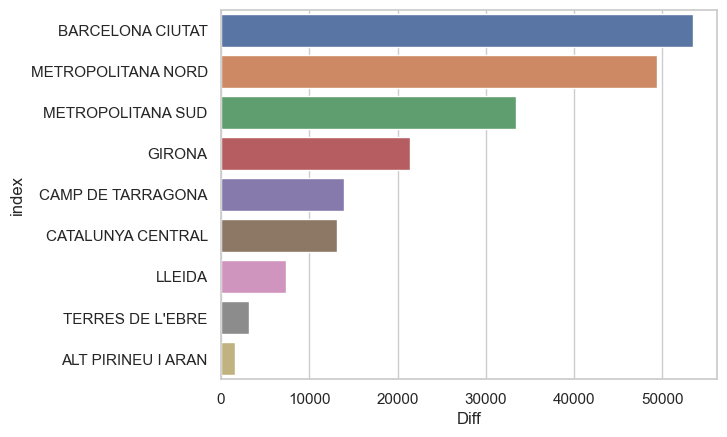

In [428]:
ax = sns.barplot(x="Diff", y="index", data=sanReg.drop([8]).sort_values("Diff",ascending=False))